In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Import Data

In [2]:
original_data = pd.read_excel('find_my_buddy.csv.xlsx', sheet_name='Buddy Sheet')

### What information do we have?

In [3]:
type(original_data)

pandas.core.frame.DataFrame

In [4]:
print(original_data.columns)

Index(['Full Name', 'Email address', 'Gender', 'Hometown',
       'Currently living in ', 'Your Decision', 'Looking for a room mate?',
       'Course ',
       'Please Enter your Branch (If it was not listed in drop down, else leave blank)',
       'Are you open to other branch room mate?',
       'Areas of Interest (In NEU )', 'University Name (UG)',
       'Work experience (In years)',
       'Approximate distance from University (in miles)',
       'Person per room including you ( select all that applies)',
       'Apartment type', 'Can afford a monthly rent  of (Per person)',
       'Facilities required ', 'Alcohol consumption', 'Smoking',
       'Any special preferences for room mates ?', 'Food preference',
       'Culinary skills ', 'I am looking for a room mate', 'Your Hobbies',
       'Facebook profile link (optional)', 'i20 amount', 'VISA status',
       'Planned VISA interview date', 'VISA consulate - city ',
       'Do you need a Flight mate?', 'If yes, then Flight Date?',
 

### Do some of the features make any difference?

In [5]:
original_data['Any other comments  ?']

0                         NaN
1              Go Huskies..!!
2                         NaN
3      Looking for roommates.
4                         NaN
                ...          
518                       NaN
519                       NaN
520                       NaN
521                       NaN
522                       NaN
Name: Any other comments  ?, Length: 523, dtype: object

Dropping columns which intuitively dont make a difference right now.
'Email address'
'Your Decision'
'Areas of Interest (In NEU )'
'Facebook profile link (optional)'
'i20 amount'
'VISA status'
'Planned VISA interview date'
'VISA consulate - city '
'Do you need a Flight mate?', 'If yes, then Flight Date?'
'Any other comments  ?'
'Any other comments  ?'

In [6]:
original_data = original_data.drop(labels = [ 'i20 amount', 'VISA status', 'Planned VISA interview date', 'VISA consulate - city ',
       'Do you need a Flight mate?', 'If yes, then Flight Date?',
       'Any other comments  ?', 'Email address', 'Your Decision', 'Areas of Interest (In NEU )', 'Facebook profile link (optional)'], axis = 1)

In [7]:
original_data

,Full Name,Gender,Hometown,Currently living in,Looking for a room mate?,Course,"Please Enter your Branch (If it was not listed in drop down, else leave blank)",Are you open to other branch room mate?,University Name (UG),Work experience (In years),...,Apartment type,Can afford a monthly rent of (Per person),Facilities required,Alcohol consumption,Smoking,Any special preferences for room mates ?,Food preference,Culinary skills,I am looking for a room mate,Your Hobbies
0,Sachin Haldavanekar,Male,Mumbai,Mumbai,Yes,MS Computer Science,NaN,Yes,Mumbai University,3.5,...,"1BHK, 2 BHK",< $550,"Wifi, Laundry, Hot Water, Security, Kitchen, F...",Strictly NO,Strictly No,NaN,Flexible (I prefer veg or Non -veg for myself...,Sometimes,Who can cook sometimes,NaN
1,Sanket Saurav,Male,Patna,Bangalore,Yes,MS Computer Science,NaN,Yes,VTU,3.5,...,"1BHK, 2 BHK, 3BHK, 4 BHK",< $550,"Wifi, Laundry, Hot Water, Kitchen, Fridge, Heat",Flexible,Flexible,Non Smokers/Non Drinkers Preferred. Needs to m...,Flexible (I prefer veg or Non -veg for myself...,Expert,Who can cook sometimes,"Gaming, Travelling"
2,Viha Bidre,Female,Davanagere,Bangalore,Yes,MS Computer Science,NaN,Yes,Dr. Ambedkar Institute of Technology.,1.8,...,"1BHK, 2 BHK, 3BHK",< $550,"Wifi, Gym, Laundry, Hot Water, Kitchen, Fridge...",Flexible,Strictly No,NaN,Flexible (I prefer veg or Non -veg for myself...,Sometimes,Who can cook sometimes,"Photography, travelling, DIY art."
3,Sougata Dafader,Male,Kolkata,Kolkata,Yes,MS Computer Science,NaN,Yes,WBUT,3.5,...,"1BHK, 2 BHK, 3BHK, 4 BHK",< $500,"Wifi, Hot Water, Heat",Flexible,Flexible,Has humour ;),Flexible (I prefer veg or Non -veg for myself...,Sometimes,Who can cook sometimes,"Badminton, TT, football, egames like dota, Cs"
4,Athul Muralidharan,Male,Chennai,Chennai,No,MS Computer Science,NaN,Yes,SRM University,2.0,...,"Studio, 1BHK, 2 BHK, 3BHK",< $700,"Wifi, Security, Kitchen, Fridge",Flexible,Strictly No,"Take it easy people, you are welcome!",Strictly Veg,Sometimes,Who can cook sometimes,Watching movies & making music
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,Sanket Mathur,Male,Jaipur,Jaipur,Yes,MS Computer Science,NaN,No,Jaipur Engineering College and Research Center,3.0,...,"Studio, 1BHK, 2 BHK, 3BHK, 4 BHK",< $500,"Wifi, Kitchen, Heat",Flexible,Strictly No,NaN,Flexible (I prefer veg or Non -veg for myself...,Sometimes,Who can cook sometimes,NaN
519,Rohit Naik,Male,Navi Mumbai,Navi Mumbai,Yes,MS Information Systems,NaN,Yes,NaN,4.0,...,"2 BHK, 3BHK",< $500,"Wifi, Laundry, Hot Water, Security, Kitchen, F...",Strictly Yes,Strictly No,From Mumbai will be preferred,Strictly Non Veg,Sometimes,Who can cook sometimes,NaN
520,Deepak Chandwani,Male,Raipur,Raipur,Yes,MS Information Systems,NaN,Yes,NaN,2.0,...,"1BHK, 2 BHK",< $500,"Wifi, Laundry, Hot Water, Security, Kitchen, F...",Strictly NO,Strictly No,NaN,Strictly Veg,Sometimes,Who can cook sometimes,NaN
521,Nivedita,Female,Indore,Indore,Yes,MS Engineering Management,NaN,Yes,NaN,0.0,...,"Studio, 1BHK, 2 BHK",< $550,"Wifi, Gym, Laundry, Hot Water, Security, Kitch...",Flexible,Flexible,NaN,Flexible (I prefer veg or Non -veg for myself...,Sometimes,Who can cook sometimes,NaN


### Dont drop names. Keep it for recommendations later.

## Start categorizing variables

#### Male, Female to 0, 1

In [8]:
original_data['Gender'].replace(['Male','Female'], [0, 1], inplace = True)

In [9]:
original_data = original_data.drop(['Facilities required '], axis = 1)

In [10]:
original_data.columns

Index(['Full Name', 'Gender', 'Hometown', 'Currently living in ',
       'Looking for a room mate?', 'Course ',
       'Please Enter your Branch (If it was not listed in drop down, else leave blank)',
       'Are you open to other branch room mate?', 'University Name (UG)',
       'Work experience (In years)',
       'Approximate distance from University (in miles)',
       'Person per room including you ( select all that applies)',
       'Apartment type', 'Can afford a monthly rent  of (Per person)',
       'Alcohol consumption', 'Smoking',
       'Any special preferences for room mates ?', 'Food preference',
       'Culinary skills ', 'I am looking for a room mate', 'Your Hobbies'],
      dtype='object')

### Change names to more accessible ones

In [11]:
original_data.columns = ['name','gender', 'hometown', 'current_city',
       'need_roommate', 'course',
       'edu_prog',
       'open_to_other_branch', 'undergrad_uni',
       'work_ex',
       'dist_from_uni',
       'person_per_room',
       'apt_type', 'rent_budget',
       'alcohol', 'smoking',
       'special_pref', 'food_pref',
       'cul_skills ', 'looking_for_roommate', 'hobbies']

In [12]:
original_data = original_data.drop(['edu_prog'], axis = 1)

###  Start exploring each column and encoding them wherever needed

###  1) Course

In [13]:
original_data.course.unique()

array(['MS Computer Science', 'MS Engineering Management', 'Others',
       'MS Civil Engineering', 'MS Electrical and Computer Engineering',
       'MS Energy Systems', 'MS Information Systems',
       'MS Information Assurance and Cyber Security', 'MS Data Science',
       'MS Mechanical Engineering', 'MS Computer Systems Engineering',
       nan, 'MS Industrial Engineering', 'MS Biotechnology',
       'MS Project Management'], dtype=object)

In [14]:
one_hot_course = pd.get_dummies(original_data['course'])

In [15]:
# Join one hot vectors of course and delete original
original_data = original_data.join(one_hot_course)

original_data = original_data.drop('course', axis = 1)

In [16]:
# Drop one vague reading
original_data = original_data.drop(522)

In [17]:
original_data

,name,gender,hometown,current_city,need_roommate,open_to_other_branch,undergrad_uni,work_ex,dist_from_uni,person_per_room,...,MS Data Science,MS Electrical and Computer Engineering,MS Energy Systems,MS Engineering Management,MS Industrial Engineering,MS Information Assurance and Cyber Security,MS Information Systems,MS Mechanical Engineering,MS Project Management,Others
0,Sachin Haldavanekar,0,Mumbai,Mumbai,Yes,Yes,Mumbai University,3.5,<3,"1, 2, 3",...,0,0,0,0,0,0,0,0,0,0
1,Sanket Saurav,0,Patna,Bangalore,Yes,Yes,VTU,3.5,<3,"1, 2, 3",...,0,0,0,0,0,0,0,0,0,0
2,Viha Bidre,1,Davanagere,Bangalore,Yes,Yes,Dr. Ambedkar Institute of Technology.,1.8,<3,2,...,0,0,0,0,0,0,0,0,0,0
3,Sougata Dafader,0,Kolkata,Kolkata,Yes,Yes,WBUT,3.5,<5,"2, 3, I can stay in Hall too",...,0,0,0,0,0,0,0,0,0,0
4,Athul Muralidharan,0,Chennai,Chennai,No,Yes,SRM University,2.0,<10,"2, 3",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,Ankur Bambharoliya,0,Rajkot,Mumbai,Yes,Yes,Dharmsinh Desai university,3.0,<3,"2, 3, 4, I can stay in Hall too",...,0,0,0,0,0,0,0,0,0,0
518,Sanket Mathur,0,Jaipur,Jaipur,Yes,No,Jaipur Engineering College and Research Center,3.0,<1,2,...,0,0,0,0,0,0,0,0,0,0
519,Rohit Naik,0,Navi Mumbai,Navi Mumbai,Yes,Yes,NaN,4.0,<3,"1, 2",...,0,0,0,0,0,0,1,0,0,0
520,Deepak Chandwani,0,Raipur,Raipur,Yes,Yes,NaN,2.0,<3,"2, 3",...,0,0,0,0,0,0,1,0,0,0


### 2) Hometown and current city

In [18]:
original_data['hometown'] = original_data['hometown'].str.strip().str.lower()
original_data['current_city'] = original_data['current_city'].str.strip().str.lower()

In [19]:
print('Proportion of people currently in the same city as their hometown:')
np.sum(original_data['hometown'] == original_data['current_city'])/len(original_data)

Proportion of people currently in the same city as their hometown:


0.6053639846743295

### 3) Undergrad universities

In [20]:
original_data['undergrad_uni'] = original_data['undergrad_uni'].str.strip().str.lower()

In [21]:
pd.value_counts(original_data['undergrad_uni'])

mumbai university                                                55
vtu                                                              19
pune university                                                  12
university of mumbai                                             12
vjti                                                              6
                                                                 ..
da-iict                                                           1
vit university                                                    1
veermata jijabai technological institute                          1
government college of engineering and research, awasari, pune     1
jaipur engineering college and research center                    1
Name: undergrad_uni, Length: 224, dtype: int64

In [22]:
mask = original_data.undergrad_uni.str.contains('mumbai')

In [23]:
mask

0       True
1      False
2      False
3      False
4      False
       ...  
517    False
518    False
519      NaN
520      NaN
521      NaN
Name: undergrad_uni, Length: 522, dtype: object

In [24]:
new_unis = np.array(original_data['undergrad_uni'])

In [25]:
# List of universities
new_unis

array(['mumbai university', 'vtu',
       'dr. ambedkar institute of technology.', 'wbut', 'srm university',
       nan, 'msrit', nan, 'government college of technology', nan, 'vtu',
       'jntu', nan,
       'shri ramdeobaba college of engineering and management', 'h', 'pu',
       'madras institute of technology', 'vjti', 'nagpur university',
       'svit, vasad, gujarat (gtu', nan,
       'toc h institute of science and technology', 'mumbai university',
       'pesit south campus, vtu', nan, 'mdu', nan, nan, 'vit pune',
       'national  institute of technology raipur', nan,
       'biju patnaik university of technology', 'nagpur university',
       'nit trichy', 'vit vellore', 'mumbai university', nan, nan,
       'sri bhagawan mahaveer jain college of engineering',
       'dharmsinh desai university', 'maharishi dayanand university',
       'bits pilani, goa campus', 'jntu', nan, 'mumbai', 'sgbau amravati',
       'mumbai university',
       'indian institute of technology, bhuba

In [26]:
# Dataframe of observations where theres any NA value anywhere.
original_data[original_data.isnull().any(axis=1)]

,name,gender,hometown,current_city,need_roommate,open_to_other_branch,undergrad_uni,work_ex,dist_from_uni,person_per_room,...,MS Data Science,MS Electrical and Computer Engineering,MS Energy Systems,MS Engineering Management,MS Industrial Engineering,MS Information Assurance and Cyber Security,MS Information Systems,MS Mechanical Engineering,MS Project Management,Others
0,Sachin Haldavanekar,0,mumbai,mumbai,Yes,Yes,mumbai university,3.5,<3,"1, 2, 3",...,0,0,0,0,0,0,0,0,0,0
2,Viha Bidre,1,davanagere,bangalore,Yes,Yes,dr. ambedkar institute of technology.,1.8,<3,2,...,0,0,0,0,0,0,0,0,0,0
5,Megha Suvarna,1,mangalore,pune,Yes,Yes,NaN,2.8,<3,1,...,0,0,0,0,0,0,0,0,0,0
6,Vishnu,0,nileshwar,bangalore,Yes,Yes,msrit,3.0,<10,"1, 2",...,0,0,0,1,0,0,0,0,0,0
7,Srashti Kasliwal,1,indore,mumbai,Yes,Yes,NaN,3.5,<5,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,Ankur Bambharoliya,0,rajkot,mumbai,Yes,Yes,dharmsinh desai university,3.0,<3,"2, 3, 4, I can stay in Hall too",...,0,0,0,0,0,0,0,0,0,0
518,Sanket Mathur,0,jaipur,jaipur,Yes,No,jaipur engineering college and research center,3.0,<1,2,...,0,0,0,0,0,0,0,0,0,0
519,Rohit Naik,0,navi mumbai,navi mumbai,Yes,Yes,NaN,4.0,<3,"1, 2",...,0,0,0,0,0,0,1,0,0,0
520,Deepak Chandwani,0,raipur,raipur,Yes,Yes,NaN,2.0,<3,"2, 3",...,0,0,0,0,0,0,1,0,0,0


In [27]:
# Second most popular city after Mumbai is Bangalore
original_data[original_data['current_city'] == 'bangalore']

,name,gender,hometown,current_city,need_roommate,open_to_other_branch,undergrad_uni,work_ex,dist_from_uni,person_per_room,...,MS Data Science,MS Electrical and Computer Engineering,MS Energy Systems,MS Engineering Management,MS Industrial Engineering,MS Information Assurance and Cyber Security,MS Information Systems,MS Mechanical Engineering,MS Project Management,Others
1,Sanket Saurav,0,patna,bangalore,Yes,Yes,vtu,3.50,<3,"1, 2, 3",...,0,0,0,0,0,0,0,0,0,0
2,Viha Bidre,1,davanagere,bangalore,Yes,Yes,dr. ambedkar institute of technology.,1.80,<3,2,...,0,0,0,0,0,0,0,0,0,0
6,Vishnu,0,nileshwar,bangalore,Yes,Yes,msrit,3.00,<10,"1, 2",...,0,0,0,1,0,0,0,0,0,0
12,Tejas Harish,0,bangalore,bangalore,Yes,Yes,NaN,0.00,<3,1,...,0,0,0,0,0,0,0,0,0,0
20,Keerthan Bharadwaj,0,bangalore,bangalore,Yes,Yes,NaN,0.00,<3,2,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,Aayushi Maheshwari,1,vaododara,bangalore,Yes,No,ad patel institute of technology,2.00,<5,"1, 2, 3",...,0,0,0,0,0,0,0,0,0,0
481,Visakh Venkitaramanan,0,trivandrum,bangalore,Yes,Yes,NaN,3.00,<3,"1, 2",...,0,0,0,0,1,0,0,0,0,0
484,Dinesh Maria antony,0,chennai,bangalore,Yes,Yes,anna university,2.50,<3,"2, 3, 4, I can stay in Hall too",...,0,0,0,0,0,0,1,0,0,0
486,Abhilash,0,coimbatore,bangalore,Yes,Yes,"kumaraguru college of technology, coimbatore",2.00,<3,"4, I can stay in Hall too",...,0,0,0,1,0,0,0,0,0,0


In [28]:
print("Counts of NA's in every feature:")
original_data.isnull().sum()

Counts of NA's in every feature:


name                                             0
gender                                           0
hometown                                         0
current_city                                     0
need_roommate                                    0
open_to_other_branch                             9
undergrad_uni                                  138
work_ex                                          9
dist_from_uni                                    9
person_per_room                                  9
apt_type                                         9
rent_budget                                      9
alcohol                                          9
smoking                                          9
special_pref                                   369
food_pref                                        9
cul_skills                                      16
looking_for_roommate                            23
hobbies                                        247
MS Biotechnology               

### 4) Open to roommates from other branch

In [29]:
pd.value_counts(original_data['open_to_other_branch'])

Yes    477
No      36
Name: open_to_other_branch, dtype: int64

In [30]:
# Fill NA's with the most frequent value
original_data.open_to_other_branch = original_data.open_to_other_branch.fillna('Yes')

In [31]:
# Check nulls now
original_data.open_to_other_branch.isnull().sum()

0

### 5) Undergrad university

In [32]:
original_data.undergrad_uni.value_counts()

mumbai university                                                55
vtu                                                              19
pune university                                                  12
university of mumbai                                             12
vjti                                                              6
                                                                 ..
da-iict                                                           1
vit university                                                    1
veermata jijabai technological institute                          1
government college of engineering and research, awasari, pune     1
jaipur engineering college and research center                    1
Name: undergrad_uni, Length: 224, dtype: int64

In [33]:
'''This feature is too messy right now cause people were allowed to manually write into this. 
So too many variations for the same universities like people repeating names, using abbreviations etc.
Can let go of this bias because hometown and current city capture this information already.'''
original_data = original_data.drop(labels=['undergrad_uni'], axis = 1)

In [34]:
original_data.isnull().sum()

name                                             0
gender                                           0
hometown                                         0
current_city                                     0
need_roommate                                    0
open_to_other_branch                             0
work_ex                                          9
dist_from_uni                                    9
person_per_room                                  9
apt_type                                         9
rent_budget                                      9
alcohol                                          9
smoking                                          9
special_pref                                   369
food_pref                                        9
cul_skills                                      16
looking_for_roommate                            23
hobbies                                        247
MS Biotechnology                                 0
MS Civil Engineering           

### 6) Work experience
This is crucial since this data does not contain age as a feature. Years of work experience+22(avg graduation age) can indicate age of users.

In [35]:
original_data.work_ex.value_counts()

0.000    177
2.000     75
1.000     52
3.000     32
1.500     22
2.500     18
5.000     12
1.800     11
0.500     10
3.500      9
0.600      7
2.600      6
2.800      6
1.700      6
0.800      5
4.000      5
0.700      5
6.000      4
0.900      4
0.300      4
1.600      3
1.400      3
2.400      3
0.400      3
2.200      3
2.700      3
2.100      2
4.500      2
0.750      2
3.800      2
9.000      2
1.100      2
6.500      1
3.900      1
3.750      1
0.200      1
2.750      1
0.250      1
1.300      1
3.600      1
2.300      1
0.160      1
0.167      1
1.750      1
1.080      1
Name: work_ex, dtype: int64

In [36]:
# Get non null values, average them and change work ex to avg work ex value

In [37]:
work_ex_avg = np.average(original_data.work_ex[original_data.work_ex.notnull()])

original_data.work_ex = original_data.work_ex.fillna(work_ex_avg)

In [38]:
original_data.work_ex.isnull().sum()

0

### 7) Distance from university

In [39]:
# Get non null values, average them and change distance to avg distance value

In [40]:
# Fix two vague values
#original_data.set_value(206, 'dist_from_uni', '<10')
original_data.at[206, 'dist_from_uni']='<10'

In [41]:
#original_data.set_value(130, 'dist_from_uni', '<10')
original_data.at[130, 'dist_from_uni']='<10'

In [42]:
# Change distance to int
original_data.dist_from_uni[original_data.dist_from_uni.notnull()] = \
[int(d[1:]) for d in original_data.dist_from_uni[original_data.dist_from_uni.notnull()]]

In [43]:
original_data.dist_from_uni.isnull().sum()

9

In [44]:
# Get avg distance students prefer staying from university
dist_avg = np.sum(original_data.dist_from_uni[original_data.dist_from_uni.notnull()])/len(original_data.dist_from_uni\
                                                                                [original_data.dist_from_uni.notnull()])

In [45]:
dist_avg

4.021442495126705

In [46]:
original_data['dist_from_uni'] = original_data['dist_from_uni'].apply(float)

original_data.dist_from_uni = original_data.dist_from_uni.fillna(dist_avg)

In [47]:
original_data.dist_from_uni.isnull().sum()

0

In [48]:
original_data.isnull().sum()

name                                             0
gender                                           0
hometown                                         0
current_city                                     0
need_roommate                                    0
open_to_other_branch                             0
work_ex                                          0
dist_from_uni                                    0
person_per_room                                  9
apt_type                                         9
rent_budget                                      9
alcohol                                          9
smoking                                          9
special_pref                                   369
food_pref                                        9
cul_skills                                      16
looking_for_roommate                            23
hobbies                                        247
MS Biotechnology                                 0
MS Civil Engineering           

### 8) Person Per Room

Have to handle number of people per room. Hall indication is by text and all other numbers indicate number of people per room.
So I've created a new binary feature indicating if a user is okay with staying in the living room or no.

In [49]:
hall_ind = 'I can stay in Hall too'
hall_yes_no = [1 if hall_ind in str(d) else 0 for d in original_data.person_per_room]

In [50]:
original_data['hall_yes_no'] = hall_yes_no

In [51]:
original_data

,name,gender,hometown,current_city,need_roommate,open_to_other_branch,work_ex,dist_from_uni,person_per_room,apt_type,...,MS Electrical and Computer Engineering,MS Energy Systems,MS Engineering Management,MS Industrial Engineering,MS Information Assurance and Cyber Security,MS Information Systems,MS Mechanical Engineering,MS Project Management,Others,hall_yes_no
0,Sachin Haldavanekar,0,mumbai,mumbai,Yes,Yes,3.5,3.0,"1, 2, 3","1BHK, 2 BHK",...,0,0,0,0,0,0,0,0,0,0
1,Sanket Saurav,0,patna,bangalore,Yes,Yes,3.5,3.0,"1, 2, 3","1BHK, 2 BHK, 3BHK, 4 BHK",...,0,0,0,0,0,0,0,0,0,0
2,Viha Bidre,1,davanagere,bangalore,Yes,Yes,1.8,3.0,2,"1BHK, 2 BHK, 3BHK",...,0,0,0,0,0,0,0,0,0,0
3,Sougata Dafader,0,kolkata,kolkata,Yes,Yes,3.5,5.0,"2, 3, I can stay in Hall too","1BHK, 2 BHK, 3BHK, 4 BHK",...,0,0,0,0,0,0,0,0,0,1
4,Athul Muralidharan,0,chennai,chennai,No,Yes,2.0,10.0,"2, 3","Studio, 1BHK, 2 BHK, 3BHK",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,Ankur Bambharoliya,0,rajkot,mumbai,Yes,Yes,3.0,3.0,"2, 3, 4, I can stay in Hall too","Studio, 1BHK, 2 BHK, 3BHK, 4 BHK",...,0,0,0,0,0,0,0,0,0,1
518,Sanket Mathur,0,jaipur,jaipur,Yes,No,3.0,1.0,2,"Studio, 1BHK, 2 BHK, 3BHK, 4 BHK",...,0,0,0,0,0,0,0,0,0,0
519,Rohit Naik,0,navi mumbai,navi mumbai,Yes,Yes,4.0,3.0,"1, 2","2 BHK, 3BHK",...,0,0,0,0,0,1,0,0,0,0
520,Deepak Chandwani,0,raipur,raipur,Yes,Yes,2.0,3.0,"2, 3","1BHK, 2 BHK",...,0,0,0,0,0,1,0,0,0,0


Does creating dummy variables help?

In [52]:
pd.get_dummies(original_data.person_per_room)

,1,2,3,4,"1, 2","1, 2, 3","1, 2, 3, 4","1, 2, 3, 4, I can stay in Hall too","1, 2, 3, I can stay in Hall too","1, 2, I can stay in Hall too",...,"2, 3, 4","2, 3, 4, I can stay in Hall too","2, 3, I can stay in Hall too","2, 4","2, 4, I can stay in Hall too","2, I can stay in Hall too","3, 4","3, 4, I can stay in Hall too","4, I can stay in Hall too",I can stay in Hall too
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
518,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
519,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
520,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Too many new features. Cant do this.

Save this for further work.

In [53]:
original_data.to_csv('original_data_2.csv')

# Start new here with semi-cleaned CSV

In [54]:
original_data = pd.read_csv('original_data_2.csv', index_col=0)

In [55]:
original_data

,name,gender,hometown,current_city,need_roommate,open_to_other_branch,work_ex,dist_from_uni,person_per_room,apt_type,...,MS Electrical and Computer Engineering,MS Energy Systems,MS Engineering Management,MS Industrial Engineering,MS Information Assurance and Cyber Security,MS Information Systems,MS Mechanical Engineering,MS Project Management,Others,hall_yes_no
0,Sachin Haldavanekar,0,mumbai,mumbai,Yes,Yes,3.5,3.0,"1, 2, 3","1BHK, 2 BHK",...,0,0,0,0,0,0,0,0,0,0
1,Sanket Saurav,0,patna,bangalore,Yes,Yes,3.5,3.0,"1, 2, 3","1BHK, 2 BHK, 3BHK, 4 BHK",...,0,0,0,0,0,0,0,0,0,0
2,Viha Bidre,1,davanagere,bangalore,Yes,Yes,1.8,3.0,2,"1BHK, 2 BHK, 3BHK",...,0,0,0,0,0,0,0,0,0,0
3,Sougata Dafader,0,kolkata,kolkata,Yes,Yes,3.5,5.0,"2, 3, I can stay in Hall too","1BHK, 2 BHK, 3BHK, 4 BHK",...,0,0,0,0,0,0,0,0,0,1
4,Athul Muralidharan,0,chennai,chennai,No,Yes,2.0,10.0,"2, 3","Studio, 1BHK, 2 BHK, 3BHK",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,Ankur Bambharoliya,0,rajkot,mumbai,Yes,Yes,3.0,3.0,"2, 3, 4, I can stay in Hall too","Studio, 1BHK, 2 BHK, 3BHK, 4 BHK",...,0,0,0,0,0,0,0,0,0,1
518,Sanket Mathur,0,jaipur,jaipur,Yes,No,3.0,1.0,2,"Studio, 1BHK, 2 BHK, 3BHK, 4 BHK",...,0,0,0,0,0,0,0,0,0,0
519,Rohit Naik,0,navi mumbai,navi mumbai,Yes,Yes,4.0,3.0,"1, 2","2 BHK, 3BHK",...,0,0,0,0,0,1,0,0,0,0
520,Deepak Chandwani,0,raipur,raipur,Yes,Yes,2.0,3.0,"2, 3","1BHK, 2 BHK",...,0,0,0,0,0,1,0,0,0,0


In [56]:
original_data.isnull().sum()

name                                             0
gender                                           0
hometown                                         0
current_city                                     0
need_roommate                                    0
open_to_other_branch                             0
work_ex                                          0
dist_from_uni                                    0
person_per_room                                  9
apt_type                                         9
rent_budget                                      9
alcohol                                          9
smoking                                          9
special_pref                                   369
food_pref                                        9
cul_skills                                      16
looking_for_roommate                            23
hobbies                                        247
MS Biotechnology                                 0
MS Civil Engineering           

Getting back to person per room feature.

In [57]:
# Taking a look at which indices contain just the hall indicator, and printing them. Then change it to 2 (avg)
for ind, i in enumerate(original_data.person_per_room):
    if len(str(i).split(',')) == 1 and hall_ind in str(i):
        print(ind, i)
        #original_data.set_value(ind, 'person_per_room', 2)
        original_data.at[ind, 'person_per_room']=2

87 I can stay in Hall too
145 I can stay in Hall too
346 I can stay in Hall too
370 I can stay in Hall too
399 I can stay in Hall too
509 I can stay in Hall too


I've decided to change the feature to mke it easier to use. Instead of the current range of number of people, keep only max number of people. That anyway gives us the range and doesnt lead to an increase in dimensions.

In [58]:
nansss = 0
max_ppr = []
for d in original_data.person_per_room:
    try:    
        if hall_ind in str(d):
            new_d = str(d).split(',')
            del(new_d[-1])
            max_per_room = (max(int(j) for j in new_d))

        else:
            max_per_room = (max(int(j) for j in str(d).split(',')))
#         print(max_per_room)
        max_ppr.append(max_per_room)
        
    except:
        nansss += 1
        max_ppr.append(d)
#         print(d)
print('NAN COUNT:', nansss)
print('Length of ppr:', len(max_ppr))

NAN COUNT: 9
Length of ppr: 522


In [59]:
original_data['max_ppr'] = max_ppr

original_data = original_data.drop(labels=['person_per_room'], axis = 1)

# Now fill NA's with avg value of maximum number of people per room.
original_data.max_ppr = original_data.max_ppr.fillna(np.average(original_data.max_ppr[original_data.max_ppr.notnull()]))

In [60]:
original_data.isnull().sum()

name                                             0
gender                                           0
hometown                                         0
current_city                                     0
need_roommate                                    0
open_to_other_branch                             0
work_ex                                          0
dist_from_uni                                    0
apt_type                                         9
rent_budget                                      9
alcohol                                          9
smoking                                          9
special_pref                                   369
food_pref                                        9
cul_skills                                      16
looking_for_roommate                            23
hobbies                                        247
MS Biotechnology                                 0
MS Civil Engineering                             0
MS Computer Science            

#### 9) Apartment type

Create dummy variable but by hand.

In [61]:
original_data.apt_type = original_data.apt_type.fillna('Studio, 1BHK, 2 BHK, 3BHK, 4 BHK')

In [62]:
apt_types = ['1BHK', '2 BHK', '3BHK', '4 BHK', 'Studio']
for a in apt_types:
    original_data[a] = [0]*len(original_data)

In [63]:
original_data

,name,gender,hometown,current_city,need_roommate,open_to_other_branch,work_ex,dist_from_uni,apt_type,rent_budget,...,MS Mechanical Engineering,MS Project Management,Others,hall_yes_no,max_ppr,1BHK,2 BHK,3BHK,4 BHK,Studio
0,Sachin Haldavanekar,0,mumbai,mumbai,Yes,Yes,3.5,3.0,"1BHK, 2 BHK",< $550,...,0,0,0,0,3.0,0,0,0,0,0
1,Sanket Saurav,0,patna,bangalore,Yes,Yes,3.5,3.0,"1BHK, 2 BHK, 3BHK, 4 BHK",< $550,...,0,0,0,0,3.0,0,0,0,0,0
2,Viha Bidre,1,davanagere,bangalore,Yes,Yes,1.8,3.0,"1BHK, 2 BHK, 3BHK",< $550,...,0,0,0,0,2.0,0,0,0,0,0
3,Sougata Dafader,0,kolkata,kolkata,Yes,Yes,3.5,5.0,"1BHK, 2 BHK, 3BHK, 4 BHK",< $500,...,0,0,0,1,3.0,0,0,0,0,0
4,Athul Muralidharan,0,chennai,chennai,No,Yes,2.0,10.0,"Studio, 1BHK, 2 BHK, 3BHK",< $700,...,0,0,0,0,3.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,Ankur Bambharoliya,0,rajkot,mumbai,Yes,Yes,3.0,3.0,"Studio, 1BHK, 2 BHK, 3BHK, 4 BHK",< $550,...,0,0,0,1,4.0,0,0,0,0,0
518,Sanket Mathur,0,jaipur,jaipur,Yes,No,3.0,1.0,"Studio, 1BHK, 2 BHK, 3BHK, 4 BHK",< $500,...,0,0,0,0,2.0,0,0,0,0,0
519,Rohit Naik,0,navi mumbai,navi mumbai,Yes,Yes,4.0,3.0,"2 BHK, 3BHK",< $500,...,0,0,0,0,2.0,0,0,0,0,0
520,Deepak Chandwani,0,raipur,raipur,Yes,Yes,2.0,3.0,"1BHK, 2 BHK",< $500,...,0,0,0,0,3.0,0,0,0,0,0


Insert indicator values for apt type.

In [64]:
for ind, apt_choice in enumerate(original_data.apt_type):
# try:
    for at in apt_types:
        if at in str(apt_choice):
            #original_data.set_value(ind, at, 1)
            original_data.at[ind, at]=1
            
#     except:
#         print(apt_choice)

In [65]:
original_data.isnull().sum()

name                                             0
gender                                           0
hometown                                         0
current_city                                     0
need_roommate                                    0
open_to_other_branch                             0
work_ex                                          0
dist_from_uni                                    0
apt_type                                         0
rent_budget                                      9
alcohol                                          9
smoking                                          9
special_pref                                   369
food_pref                                        9
cul_skills                                      16
looking_for_roommate                            23
hobbies                                        247
MS Biotechnology                                 0
MS Civil Engineering                             0
MS Computer Science            

#### 10) Rent budget

What are peoples budgets like?

In [66]:
original_data.rent_budget.value_counts()

< $500     165
< $550     134
< $700      84
< $450      79
< $400      34
< $1000     15
$1000 +      2
Name: rent_budget, dtype: int64

In [67]:
import matplotlib.pyplot as plt

In [68]:
x = original_data.rent_budget.value_counts()

<AxesSubplot:>

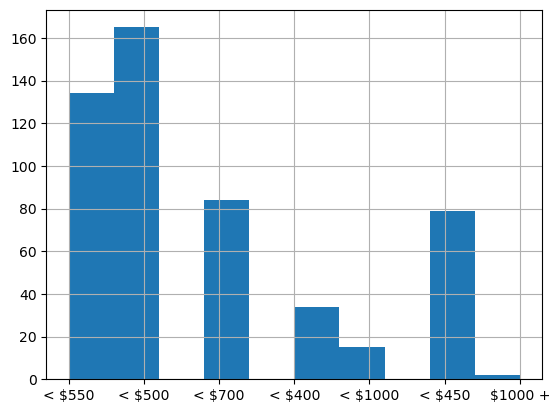

In [69]:
original_data.rent_budget.hist()

Change budget to integer by taking just the numeric values.

In [70]:
original_data.rent_budget = original_data.rent_budget.fillna('< $500')

In [71]:
for ind, budget in enumerate(original_data.rent_budget):
    try:
        budget = str(budget).strip()
        original_data.set_value(ind, 'rent_budget', int(budget[3:]))
#         break
    except:
        continue

In [72]:
original_data

,name,gender,hometown,current_city,need_roommate,open_to_other_branch,work_ex,dist_from_uni,apt_type,rent_budget,...,MS Mechanical Engineering,MS Project Management,Others,hall_yes_no,max_ppr,1BHK,2 BHK,3BHK,4 BHK,Studio
0,Sachin Haldavanekar,0,mumbai,mumbai,Yes,Yes,3.5,3.0,"1BHK, 2 BHK",< $550,...,0,0,0,0,3.0,1,1,0,0,0
1,Sanket Saurav,0,patna,bangalore,Yes,Yes,3.5,3.0,"1BHK, 2 BHK, 3BHK, 4 BHK",< $550,...,0,0,0,0,3.0,1,1,1,1,0
2,Viha Bidre,1,davanagere,bangalore,Yes,Yes,1.8,3.0,"1BHK, 2 BHK, 3BHK",< $550,...,0,0,0,0,2.0,1,1,1,0,0
3,Sougata Dafader,0,kolkata,kolkata,Yes,Yes,3.5,5.0,"1BHK, 2 BHK, 3BHK, 4 BHK",< $500,...,0,0,0,1,3.0,1,1,1,1,0
4,Athul Muralidharan,0,chennai,chennai,No,Yes,2.0,10.0,"Studio, 1BHK, 2 BHK, 3BHK",< $700,...,0,0,0,0,3.0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,Ankur Bambharoliya,0,rajkot,mumbai,Yes,Yes,3.0,3.0,"Studio, 1BHK, 2 BHK, 3BHK, 4 BHK",< $550,...,0,0,0,1,4.0,1,1,1,1,1
518,Sanket Mathur,0,jaipur,jaipur,Yes,No,3.0,1.0,"Studio, 1BHK, 2 BHK, 3BHK, 4 BHK",< $500,...,0,0,0,0,2.0,1,1,1,1,1
519,Rohit Naik,0,navi mumbai,navi mumbai,Yes,Yes,4.0,3.0,"2 BHK, 3BHK",< $500,...,0,0,0,0,2.0,0,1,1,0,0
520,Deepak Chandwani,0,raipur,raipur,Yes,Yes,2.0,3.0,"1BHK, 2 BHK",< $500,...,0,0,0,0,3.0,1,1,0,0,0


Temporary function to check null values.

In [73]:
def check_null():
    return(original_data.isnull().sum())

In [74]:
original_data.rent_budget.value_counts()

< $500     174
< $550     134
< $700      84
< $450      79
< $400      34
< $1000     15
$1000 +      2
Name: rent_budget, dtype: int64

In [75]:
for ind, bud in enumerate(original_data.rent_budget):
# try:
#     print(bud)
    if '$1000 +' in str(bud):
            original_data.at[ind, 'rent_budget']=1000

In [76]:
check_null()

name                                             0
gender                                           0
hometown                                         0
current_city                                     0
need_roommate                                    0
open_to_other_branch                             0
work_ex                                          0
dist_from_uni                                    0
apt_type                                         0
rent_budget                                      0
alcohol                                          9
smoking                                          9
special_pref                                   369
food_pref                                        9
cul_skills                                      16
looking_for_roommate                            23
hobbies                                        247
MS Biotechnology                                 0
MS Civil Engineering                             0
MS Computer Science            

#### 11) Alcohol

In [77]:
original_data.alcohol.value_counts()

Flexible        420
Strictly NO      70
Strictly Yes     23
Name: alcohol, dtype: int64

In [78]:
original_data.alcohol = original_data.alcohol.fillna('Flexible')

original_data.alcohol = original_data.alcohol.replace('Flexible', 0)
original_data.alcohol = original_data.alcohol.replace('Strictly NO', 1)
original_data.alcohol = original_data.alcohol.replace('Strictly Yes', 2)

In [79]:
original_data.alcohol.value_counts()

0    429
1     70
2     23
Name: alcohol, dtype: int64

#### 12) Smoking

In [80]:
original_data.smoking.value_counts()

Flexible        288
Strictly No     222
Strictly Yes      3
Name: smoking, dtype: int64

In [81]:
original_data.smoking = original_data.smoking.fillna('Flexible')

original_data.smoking = original_data.smoking.replace('Flexible', 0)
original_data.smoking = original_data.smoking.replace('Strictly No', 1)
original_data.smoking = original_data.smoking.replace('Strictly Yes', 2)

In [82]:
original_data.smoking.value_counts()

0    297
1    222
2      3
Name: smoking, dtype: int64

In [83]:
check_null()

name                                             0
gender                                           0
hometown                                         0
current_city                                     0
need_roommate                                    0
open_to_other_branch                             0
work_ex                                          0
dist_from_uni                                    0
apt_type                                         0
rent_budget                                      0
alcohol                                          0
smoking                                          0
special_pref                                   369
food_pref                                        9
cul_skills                                      16
looking_for_roommate                            23
hobbies                                        247
MS Biotechnology                                 0
MS Civil Engineering                             0
MS Computer Science            

Special preferences does not add anything new of significance at least not uniformly. So dropping it.

In [84]:
original_data = original_data.drop(labels = ['special_pref'], axis = 1)

In [85]:
check_null()

name                                             0
gender                                           0
hometown                                         0
current_city                                     0
need_roommate                                    0
open_to_other_branch                             0
work_ex                                          0
dist_from_uni                                    0
apt_type                                         0
rent_budget                                      0
alcohol                                          0
smoking                                          0
food_pref                                        9
cul_skills                                      16
looking_for_roommate                            23
hobbies                                        247
MS Biotechnology                                 0
MS Civil Engineering                             0
MS Computer Science                              0
MS Computer Systems Engineering

#### 13) Food preferences

In [86]:
original_data.food_pref.value_counts()

Flexible (I prefer  veg or Non -veg for myself but ready to live with anyone)    396
Strictly Veg                                                                      91
Strictly Non Veg                                                                  26
Name: food_pref, dtype: int64

In [87]:
original_data.food_pref = original_data.food_pref.fillna('Flexible (I prefer  veg or Non -veg for myself but ready to live with anyone)')

original_data.food_pref = original_data.food_pref.replace('Flexible (I prefer  veg or Non -veg for myself but ready to live with anyone)', 0)
original_data.food_pref = original_data.food_pref.replace('Strictly Veg', 1)
original_data.food_pref = original_data.food_pref.replace('Strictly Non Veg', 2)

In [88]:
original_data.food_pref.value_counts()

0    405
1     91
2     26
Name: food_pref, dtype: int64

In [89]:
check_null()

name                                             0
gender                                           0
hometown                                         0
current_city                                     0
need_roommate                                    0
open_to_other_branch                             0
work_ex                                          0
dist_from_uni                                    0
apt_type                                         0
rent_budget                                      0
alcohol                                          0
smoking                                          0
food_pref                                        0
cul_skills                                      16
looking_for_roommate                            23
hobbies                                        247
MS Biotechnology                                 0
MS Civil Engineering                             0
MS Computer Science                              0
MS Computer Systems Engineering

#### 14) Cul skills

In [90]:
original_data['cul_skills ']

0      Sometimes
1         Expert
2      Sometimes
3      Sometimes
4      Sometimes
         ...    
517       Expert
518    Sometimes
519    Sometimes
520    Sometimes
521    Sometimes
Name: cul_skills , Length: 522, dtype: object

In [91]:
original_data = original_data.rename(columns={'cul_skills ': 'cul_skills'})

In [92]:
original_data.cul_skills.value_counts()

Sometimes      415
Expert          60
Never tried     31
Name: cul_skills, dtype: int64

In [93]:
original_data.cul_skills = original_data.cul_skills.fillna('Sometimes')

original_data.cul_skills = original_data.cul_skills.replace('Sometimes', 0)
original_data.cul_skills = original_data.cul_skills.replace('Expert', 1)
original_data.cul_skills = original_data.cul_skills.replace('Never tried', 2)

In [94]:
original_data.cul_skills.value_counts()

0    431
1     60
2     31
Name: cul_skills, dtype: int64

In [95]:
check_null()

name                                             0
gender                                           0
hometown                                         0
current_city                                     0
need_roommate                                    0
open_to_other_branch                             0
work_ex                                          0
dist_from_uni                                    0
apt_type                                         0
rent_budget                                      0
alcohol                                          0
smoking                                          0
food_pref                                        0
cul_skills                                       0
looking_for_roommate                            23
hobbies                                        247
MS Biotechnology                                 0
MS Civil Engineering                             0
MS Computer Science                              0
MS Computer Systems Engineering

In [96]:
original_data.looking_for_roommate.value_counts()

Who can cook sometimes         404
No culinary skills required     95
Name: looking_for_roommate, dtype: int64

In [97]:
original_data.looking_for_roommate = original_data.looking_for_roommate.fillna('Who can cook sometimes')

original_data.looking_for_roommate = original_data.looking_for_roommate.replace('Who can cook sometimes', 0)
original_data.looking_for_roommate = original_data.looking_for_roommate.replace('No culinary skills required', 1)

In [98]:
check_null()

name                                             0
gender                                           0
hometown                                         0
current_city                                     0
need_roommate                                    0
open_to_other_branch                             0
work_ex                                          0
dist_from_uni                                    0
apt_type                                         0
rent_budget                                      0
alcohol                                          0
smoking                                          0
food_pref                                        0
cul_skills                                       0
looking_for_roommate                             0
hobbies                                        247
MS Biotechnology                                 0
MS Civil Engineering                             0
MS Computer Science                              0
MS Computer Systems Engineering

In [99]:
original_data = original_data.drop(labels = ['hobbies'], axis = 1)

In [100]:
check_null()

name                                           0
gender                                         0
hometown                                       0
current_city                                   0
need_roommate                                  0
open_to_other_branch                           0
work_ex                                        0
dist_from_uni                                  0
apt_type                                       0
rent_budget                                    0
alcohol                                        0
smoking                                        0
food_pref                                      0
cul_skills                                     0
looking_for_roommate                           0
MS Biotechnology                               0
MS Civil Engineering                           0
MS Computer Science                            0
MS Computer Systems Engineering                0
MS Data Science                                0
MS Electrical and Co

In [101]:
original_data

,name,gender,hometown,current_city,need_roommate,open_to_other_branch,work_ex,dist_from_uni,apt_type,rent_budget,...,MS Mechanical Engineering,MS Project Management,Others,hall_yes_no,max_ppr,1BHK,2 BHK,3BHK,4 BHK,Studio
0,Sachin Haldavanekar,0,mumbai,mumbai,Yes,Yes,3.5,3.0,"1BHK, 2 BHK",< $550,...,0,0,0,0,3.0,1,1,0,0,0
1,Sanket Saurav,0,patna,bangalore,Yes,Yes,3.5,3.0,"1BHK, 2 BHK, 3BHK, 4 BHK",< $550,...,0,0,0,0,3.0,1,1,1,1,0
2,Viha Bidre,1,davanagere,bangalore,Yes,Yes,1.8,3.0,"1BHK, 2 BHK, 3BHK",< $550,...,0,0,0,0,2.0,1,1,1,0,0
3,Sougata Dafader,0,kolkata,kolkata,Yes,Yes,3.5,5.0,"1BHK, 2 BHK, 3BHK, 4 BHK",< $500,...,0,0,0,1,3.0,1,1,1,1,0
4,Athul Muralidharan,0,chennai,chennai,No,Yes,2.0,10.0,"Studio, 1BHK, 2 BHK, 3BHK",< $700,...,0,0,0,0,3.0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,Ankur Bambharoliya,0,rajkot,mumbai,Yes,Yes,3.0,3.0,"Studio, 1BHK, 2 BHK, 3BHK, 4 BHK",< $550,...,0,0,0,1,4.0,1,1,1,1,1
518,Sanket Mathur,0,jaipur,jaipur,Yes,No,3.0,1.0,"Studio, 1BHK, 2 BHK, 3BHK, 4 BHK",< $500,...,0,0,0,0,2.0,1,1,1,1,1
519,Rohit Naik,0,navi mumbai,navi mumbai,Yes,Yes,4.0,3.0,"2 BHK, 3BHK",< $500,...,0,0,0,0,2.0,0,1,1,0,0
520,Deepak Chandwani,0,raipur,raipur,Yes,Yes,2.0,3.0,"1BHK, 2 BHK",< $500,...,0,0,0,0,3.0,1,1,0,0,0


In [102]:
original_data.to_csv('original_data_no_na.csv')

Drop apt_type since its an extra feature now, and hometown because we'll use just one location indicator(current_city) for now.

In [103]:
original_data = original_data.drop(labels = ['apt_type', 'hometown'], axis = 1)

#### 15) Current City

In [104]:
original_data.current_city.value_counts()

mumbai                 159
bangalore               84
pune                    50
chennai                 27
hyderabad               19
                      ... 
thane,mumbai             1
nigdi pune               1
ann arbor, michigan      1
nit waranagal            1
thanjavur                1
Name: current_city, Length: 85, dtype: int64

Mumbai Bangalore and Pune are the 3 most frequent locations of Masters students in our dataset.

Changing cities to categorical.

In [105]:
all_cities = original_data.current_city.unique()
num_cities = list(range(len(all_cities)))

city_num_dict = dict(zip(all_cities, num_cities))

In [106]:
city_num_dict

{'mumbai': 0,
 'bangalore': 1,
 'kolkata': 2,
 'chennai': 3,
 'pune': 4,
 'hyderabad': 5,
 'nagpur': 6,
 'h': 7,
 'wadala, mumbai': 8,
 'vadodara': 9,
 'kochi': 10,
 'raipur': 11,
 'goa': 12,
 'gurgaon': 13,
 'ann arbor, michigan': 14,
 'vijayawada': 15,
 'delhi': 16,
 'dehradun': 17,
 'surat': 18,
 'mysore': 19,
 'meerut': 20,
 'pune, maharashtra': 21,
 'bengaluru': 22,
 'navi mumbai': 23,
 'yelahanka': 24,
 'navi mumbai (panvel)': 25,
 'mangalore': 26,
 'jaipur': 27,
 'vellore': 28,
 'jalgaon': 29,
 'auranagabad': 30,
 'nellore': 31,
 'ahmedabad': 32,
 'sangli, mh': 33,
 'india': 34,
 'satara': 35,
 'thane': 36,
 'vapi': 37,
 'vidhya nagar': 38,
 'sharjah, uae': 39,
 'mumbai(bandra)': 40,
 'banaglore': 41,
 'bangalore, karnataka': 42,
 'faridabad': 43,
 'faridabad(ncr)': 44,
 'patras': 45,
 'miraj': 46,
 'bhopal': 47,
 'chandigarh': 48,
 'noida': 49,
 'coimbatore': 50,
 'indore': 51,
 'guntur': 52,
 'thane,mumbai': 53,
 'nigdi pune': 54,
 'new delhi': 55,
 'nit waranagal': 56,
 'domb

In [107]:
original_data['current_city'] = original_data['current_city'].map(city_num_dict)

In [108]:
original_data = original_data.drop(labels = ['need_roommate'], axis = 1)

#### 16) Open to other branch

In [109]:
original_data.open_to_other_branch = original_data.open_to_other_branch.replace('Yes', 0)
original_data.open_to_other_branch = original_data.open_to_other_branch.replace('No', 1)

In [110]:
original_data.isnull().sum()

name                                           0
gender                                         0
current_city                                   0
open_to_other_branch                           0
work_ex                                        0
dist_from_uni                                  0
rent_budget                                    0
alcohol                                        0
smoking                                        0
food_pref                                      0
cul_skills                                     0
looking_for_roommate                           0
MS Biotechnology                               0
MS Civil Engineering                           0
MS Computer Science                            0
MS Computer Systems Engineering                0
MS Data Science                                0
MS Electrical and Computer Engineering         0
MS Energy Systems                              0
MS Engineering Management                      0
MS Industrial Engine

Change variable names to make them more accessible.

In [111]:
original_data = original_data.rename(columns = {'1BHK':'bhk_1', '2 BHK':'bhk_2', '3BHK':'bhk_3', '4 BHK':'bhk_4', 'Studio':'studio'})

In [112]:
original_data

,name,gender,current_city,open_to_other_branch,work_ex,dist_from_uni,rent_budget,alcohol,smoking,food_pref,...,MS Mechanical Engineering,MS Project Management,Others,hall_yes_no,max_ppr,bhk_1,bhk_2,bhk_3,bhk_4,studio
0,Sachin Haldavanekar,0,0,0,3.5,3.0,< $550,1,1,0,...,0,0,0,0,3.0,1,1,0,0,0
1,Sanket Saurav,0,1,0,3.5,3.0,< $550,0,0,0,...,0,0,0,0,3.0,1,1,1,1,0
2,Viha Bidre,1,1,0,1.8,3.0,< $550,0,1,0,...,0,0,0,0,2.0,1,1,1,0,0
3,Sougata Dafader,0,2,0,3.5,5.0,< $500,0,0,0,...,0,0,0,1,3.0,1,1,1,1,0
4,Athul Muralidharan,0,3,0,2.0,10.0,< $700,0,1,1,...,0,0,0,0,3.0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,Ankur Bambharoliya,0,0,0,3.0,3.0,< $550,0,0,0,...,0,0,0,1,4.0,1,1,1,1,1
518,Sanket Mathur,0,27,1,3.0,1.0,< $500,0,1,0,...,0,0,0,0,2.0,1,1,1,1,1
519,Rohit Naik,0,23,0,4.0,3.0,< $500,2,1,2,...,0,0,0,0,2.0,0,1,1,0,0
520,Deepak Chandwani,0,11,0,2.0,3.0,< $500,1,1,1,...,0,0,0,0,3.0,1,1,0,0,0


In [113]:
original_data.columns

Index(['name', 'gender', 'current_city', 'open_to_other_branch', 'work_ex',
       'dist_from_uni', 'rent_budget', 'alcohol', 'smoking', 'food_pref',
       'cul_skills', 'looking_for_roommate', 'MS Biotechnology',
       'MS Civil Engineering', 'MS Computer Science',
       'MS Computer Systems Engineering', 'MS Data Science',
       'MS Electrical and Computer Engineering', 'MS Energy Systems',
       'MS Engineering Management', 'MS Industrial Engineering',
       'MS Information Assurance and Cyber Security', 'MS Information Systems',
       'MS Mechanical Engineering', 'MS Project Management', 'Others',
       'hall_yes_no', 'max_ppr', 'bhk_1', 'bhk_2', 'bhk_3', 'bhk_4', 'studio'],
      dtype='object')

In [114]:
original_data.dtypes

name                                            object
gender                                           int64
current_city                                     int64
open_to_other_branch                             int64
work_ex                                        float64
dist_from_uni                                  float64
rent_budget                                     object
alcohol                                          int64
smoking                                          int64
food_pref                                        int64
cul_skills                                       int64
looking_for_roommate                             int64
MS Biotechnology                                 int64
MS Civil Engineering                             int64
MS Computer Science                              int64
MS Computer Systems Engineering                  int64
MS Data Science                                  int64
MS Electrical and Computer Engineering           int64
MS Energy 

In [115]:
original_data.rent_budget.value_counts()

< $500     174
< $550     134
< $700      84
< $450      79
< $400      34
< $1000     15
1000         2
Name: rent_budget, dtype: int64

In [116]:
#This code uses the errors='coerce' argument to convert non-numeric values to NaN, and then uses the replace() method to replace the NaN values with 0. 
#This should allow you to work with the column as a numeric column, while still preserving the non-numeric values in the DataFrame.
original_data.rent_budget = pd.to_numeric(original_data.rent_budget, errors='coerce')
original_data.rent_budget = original_data.rent_budget.replace(np.nan, 0)

In [117]:
original_data.rent_budget = pd.to_numeric(original_data.rent_budget)

In [118]:
original_data.rent_budget.value_counts()

0.0       520
1000.0      2
Name: rent_budget, dtype: int64

In [119]:
original_data.dtypes

name                                            object
gender                                           int64
current_city                                     int64
open_to_other_branch                             int64
work_ex                                        float64
dist_from_uni                                  float64
rent_budget                                    float64
alcohol                                          int64
smoking                                          int64
food_pref                                        int64
cul_skills                                       int64
looking_for_roommate                             int64
MS Biotechnology                                 int64
MS Civil Engineering                             int64
MS Computer Science                              int64
MS Computer Systems Engineering                  int64
MS Data Science                                  int64
MS Electrical and Computer Engineering           int64
MS Energy 

#### Save this cleaned data for future use

In [120]:
original_data.to_csv('user_data_clean.csv')

In [121]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import hamming

og_sheet = pd.read_excel('find_my_buddy.csv.xlsx', sheet_name='Buddy Sheet')
og_sheet['Full Name'].drop(522)

meta_data = pd.read_csv('budd_new_22_6_18.csv', index_col= 0)
meta_data.columns
meta_data = meta_data.drop(labels=['looking_for_roommate', 'Others'], axis = 1)
name_list = list(og_sheet['Full Name'].drop(522))
name_list
meta_data

print("Enter Index No. to get Recommendation for that person ")
print("Note: number should be between 1 to 520")
x=int(input())

test_person = meta_data.iloc[[x]]  
test_person
meta_data[meta_data['gender'] == 0].iloc[[57]]

def get_cont_cat(dataframe, var_type):
   
    # Convert any series to dataframe
    if not isinstance(dataframe, pd.DataFrame):
        print('ip is not dataframe')
    cont_cols = ['work_ex', 'dist_from_uni', 'rent_budget']
    
    
    if var_type == 'cont':
        return dataframe[cont_cols]
    
    
    elif var_type == 'cat':
        return dataframe.drop(labels = cont_cols, axis = 1)
    
    
    else: raise ValueError('Variable type should be either "cont" or "cat"')

test_p_cont = np.array(get_cont_cat(test_person, 'cont'))
db_cont = np.array(get_cont_cat(meta_data, 'cont'))
test_p_cont.shape
db_cont.shape
test_p_cont
euclidean_distances(test_p_cont, db_cont).shape

def get_cont_dist(person, database, metric):

    to_std = np.vstack((person, database))
    
    all_std = StandardScaler().fit_transform(to_std)
    person_std = all_std[0,:].reshape(1,-1)
    database_std = all_std[1:,:]
    
    if metric == 'euclidean':
        cont_distance_matrix = euclidean_distances(person_std, database_std)
        return cont_distance_matrix


def get_cat_dist(person, database, metric):
    
    cat_distance_matrix = []
    if metric == 'hamming':
        database_df = pd.DataFrame(database)
        for index, c_row in database_df.iterrows():
            cat_distance_matrix.append(hamming(person, c_row))
    return(np.array(cat_distance_matrix)) 

test_cat = get_cont_cat(test_person, 'cat')
database_cat = get_cont_cat(meta_data[meta_data['gender'] == 0], 'cat')
get_cat_dist(test_cat.to_numpy().ravel(), database_cat.to_numpy(), 'hamming')[57]

#get_cat_dist(test_cat, get_cont_cat(meta_data[meta_data['gender'] == 0], 'cat'), 'hamming')[57]

test_cat_array = get_cont_cat(test_person, 'cat').to_numpy().ravel()
database_cat_array = get_cont_cat(meta_data[meta_data['gender'] == 0], 'cat').to_numpy()
get_cat_dist(test_cat_array, database_cat_array, 'hamming')[57]

#get_cat_dist(test_cat, get_cont_cat(meta_data, 'cat'), 'hamming')
test_cat_array = get_cont_cat(test_person, 'cat').to_numpy().ravel()
database_cat_array = get_cont_cat(meta_data, 'cat').to_numpy()
get_cat_dist(test_cat_array, database_cat_array, 'hamming')

test_cat = get_cont_cat(test_person, 'cat').to_numpy().ravel()
test_cat2 = get_cont_cat(meta_data.iloc[[34]], 'cat').to_numpy().ravel()

hamming(test_cat, test_cat2)

def findRoommate(new_person, database, n_roommates, alpha, beta):
    # Split data by gender to reduce computations
    database_g = database[database['gender'] == new_person.iloc[0]['gender']]
    name_g = [name_list[i] for i in list(database_g.index)]

    # Split new datapoint into continuous and categorical sets
    new_person_cont = get_cont_cat(new_person, 'cont').to_numpy().flatten()
    new_person_cat = get_cont_cat(new_person, 'cat').to_numpy().flatten()

    # Split database into continuous and categorical sets
    database_cont = get_cont_cat(database_g, 'cont').to_numpy()
    database_cat = get_cont_cat(database_g, 'cat').to_numpy()

    # Get distances for both continuous and categorical sets
    dist_cont = get_cont_dist(new_person_cont, database_cont, 'euclidean')
    dist_cat = get_cat_dist(new_person_cat, database_cat, 'hamming')

    # Create final distance matrix of weighted average
    final_dist = alpha*dist_cont + beta*dist_cat

    
    # Sort the distance matrix to get top n roommates
    top_n_matches = np.argsort(final_dist)[0][1 : n_roommates + 1]
    
    
    top_n_dict = {"index": top_n_matches.tolist(),
                  "name": [name_g[j] for j in top_n_matches]}

     # Print the top n matches in index:name format
    for i in range(len(top_n_matches)):
        print(f'{top_n_matches[i]}:{name_g[top_n_matches[i]]}')
        
    #print Details
    print("\n")
    print(test_person,"\n\n")
    
    for i in range(len(top_n_matches)):
        print(top_n_matches[i])
        print(meta_data.iloc[[i]],"\n")
    
    return top_n_dict

findRoommate(test_person, meta_data, 5, 1, 1)       


Enter Index No. to get Recommendation for that person 
Note: number should be between 1 to 520
43:Gauri Yadav
49:Nidhi Sarode Pundareeka
35:Mansi kulkarni
118:Nishita Sikka
115:Ankita


     gender  current_city  open_to_other_branch  work_ex  dist_from_uni  \
123       1            34                     0      0.0            5.0   

     rent_budget  alcohol  smoking  food_pref  cul_skills  ...  \
123          400        1        1          0           0  ...   

     MS Information Systems  MS Mechanical Engineering  MS Project Management  \
123                       0                          0                      0   

     hall_yes_no  max_ppr  bhk_1  bhk_2  bhk_3  bhk_4  studio  
123            1      4.0      1      0      0      0       1  

[1 rows x 30 columns] 


43
   gender  current_city  open_to_other_branch  work_ex  dist_from_uni  \
0       0             0                     0      3.5            3.0   

   rent_budget  alcohol  smoking  food_pref  cul_skills  ...  \

{'index': [43, 49, 35, 118, 115],
 'name': ['Gauri Yadav',
  'Nidhi Sarode Pundareeka',
  'Mansi kulkarni',
  'Nishita Sikka',
  'Ankita']}